<a href="https://colab.research.google.com/github/Ponter255/cuddly-chainsaw/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
---

The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

## 1. Hypothesis of Linear Regression

### $y = x_{0} + k_{1}x_{1} + k_{2}x_{2} + ... + k_{n}x_{n}$

* $y$ is the predicted value
* $x_{0}$ is the bias term.
* $x_{1}$,…,$x_{n}$ are the model parameters
* $k_{1}$, $k_{2}$,…,$k_{n}$ are the feature values.

## 2. Dataset

* Libraries

In [0]:
import pprint
import pandas                as pd
import pandas_profiling     
import numpy                 as np
import matplotlib.pyplot     as plt
from tabulate                import tabulate
from sklearn.datasets        import load_diabetes
from sklearn                 import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error, r2_score
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import RidgeCV

* Information

In [325]:
diabetes_full = load_diabetes()
print(diabetes_full.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


>* Description: Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements
>* Target: A quantitative measure of disease progression one year after baseline
>* The number of inputs should be the same of outputs ("data" and "target") 
>* Normalization refers to rescaling real valued numeric attributes into the range 0 and 1. In this dataset gender is refferred as numbers, thus normalized

In [326]:
print(diabetes_full.feature_names)
feature = diabetes_full.data.T 
age = feature[0]
sex = feature[1]
bmi = feature[2]
bp  = feature[3]
s1  = feature[4]
s2  = feature[5]
s3  = feature[6]
s4  = feature[7]
s5  = feature[8]
s6  = feature[9]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [327]:
len(diabetes_full.target)

442

In [328]:
len(diabetes_full.data)

442

### *Pandas Profiling*

Generate a very broadly structured HTML file containing most of data analysis before diving into a more specific and individual data exploration (for example, there are no missing data in this dataset).

In [0]:
#pandas_diabetes_data = pd.DataFrame(data= np.c_[diabetes_full['data'], diabetes_full['target']], columns= diabetes_full['feature_names'] + ['target'])
#pandas_profiling.ProfileReport(pandas_diabetes_full)
#print(diabetes_full.data.T[0])

### *Tabulate*

Generate a table with dateset organized in a way to better view the data.

In [0]:
#print(tabulate(diabetes_full.data, headers=diabetes_full.feature_names, tablefmt="grid" ))

## 3. Algorithm

Linear Regression model python algorithm

In [0]:
diabetes_data, diabetes_target = load_diabetes(return_X_y=True)

# Split into data train and data test
data_train, data_test, target_train, target_test = train_test_split(diabetes_data, diabetes_target, test_size=0.04, random_state=0)

#Pick up only one feature 
data_train = data_train[:, np.newaxis, 2]
data_test  = data_test[:, np.newaxis, 2]

#Scaler
scaler = StandardScaler()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_train, target_train)

# Make prediction using the testing set
diabetes_prediction = regr.predict(data_test)

* Corresponding coefficient of each individual feature, ***coef_*** gives an array of weights estimated by linear regression.

In [332]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [949.23456396]


### Mean squared error

Tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

In [333]:
print('Mean squared error: %.2f'% mean_squared_error(target_test, diabetes_prediction))

Mean squared error: 3636.22


### Coefficient of Determination (main regression score)

* In statistics, the coefficient of determination, denoted $R^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

* It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.A value of 1.0 indicates a perfect fit,and a value of 0, would indicate that the model fails to accurately model the data at all 

$R^2 = ({\frac{1}{n}*\sum_{i=1}^n\frac{[(x_{i} - \overline{x})*(y_{i} - \overline{y})]}{\theta_{x}*\theta_{y}}})^2$

> Where "n" is the number of observations used to fit the model, $x_{i}$ is the $x$ value for observation i, $\overline{x}$ is the mean $x$ value, $y_{i}$ is the $y$ value for observation i, $\overline{x}$ is the mean $y$ value, $\theta_{x}$ is the standard deviation of $x$, and $\theta_{y}$ is the standard deviation of $y$.

In [347]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(target_test, diabetes_prediction))
regr.score(data_train, target_train)

Coefficient of determination: 0.43


0.3390082336573209

## 4. Matplotlib

Plot the dataset information in a way that the method that it is being applied to model the that can be easy verified and visualized through the distribution of the data in the graphs

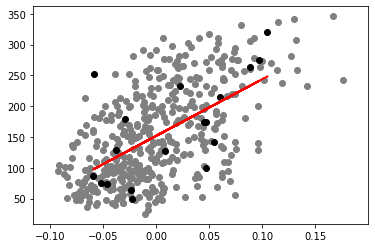

In [358]:
%matplotlib inline
plt.scatter(data_train, target_train,  color='grey')
plt.scatter(data_test, target_test,  color='black')
plt.plot(data_test, diabetes_prediction, color='red', linewidth=2)

plt.show()

## 5. Hyperparameter Optimzation
Linear Regression model optimization 

**LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)**

* *fit_intercept*: bool, optional, default True

> Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

* *normalize*: bool, optional, default False

> This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.

* *copy_X*: bool, optional, default True

> If True, X will be copied; else, it may be overwritten.

* *n_jobs*: int or None, optional (default=None)

> The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.



In [367]:
regr2 = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

# Train the model using the training sets
regr2.fit(data_train, target_train)

# Make prediction using the testing set
diabetes_prediction2 = regr2.predict(data_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'% r2_score(target_test, diabetes_prediction2))
regr2.score(data_test, target_test)

Coefficient of determination: 0.431


0.43068459534812814

**Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)**

* *alpha* = {float, ndarray of shape (n_targets,)}, default=1.0
> Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to $C^{-1}$ in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

* *solver*{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}, default=’auto’



In [362]:
clf = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=False, max_iter=None, tol=0.01, solver='cholesky', random_state=None)
clf.fit(data_train, target_train)
diabetes_prediction = clf.predict(data_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(target_test, diabetes_prediction))

Coefficient of determination: 0.31


GRID of Linear Regression

> Score | fit_intercept | normalize | copy_X | n_jobs
>--- | --- | --- | --- | ---
>  0.43 | True  | True  | True  | None
>  -3.09| False | True  | True  | None
>  -3.09| False | False | True  | None
>  -3.09| False | False | False | None
>  0.43 | True  | False | False | None
>  0.43 | True  | True  | False | None

In [340]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(diabetes_data, diabetes_target)
clf.fit(data_train, target_train)
diabetes_prediction = clf.predict(data_test)
print('Coefficient of determination: %.3f'% r2_score(target_test, diabetes_prediction))

Coefficient of determination: 0.431
